# Topics in Francia
This notebook serves to visualize the topics for the Francia-corpus.


In [1]:
import pandas as pd
from scripts.convert_mallet_comp import read_topic_doc_distribution_file
from scripts.topic_over_time import visualize_topic_over_time
from scripts.plot_vis import visualize_data
from scripts.topic_cloud import create_topic_cloud

We only computed the topic-models for the French and German corpus.

In [2]:
# Path to the mallet-output file of the german corpus.
topic_doc_de = read_topic_doc_distribution_file('../data/topics/francia.comp.txt')
# Path to the mallet-output file of the french corpus.
topic_doc_fr = read_topic_doc_distribution_file('../data/topics/francia.comp.txt')
## necessary variable because of new system in assigning the topic-keys.
new_topic_keys = pd.read_excel('../data/topics/Topic-Key-Dict.xlsx')
new_topic_label = {'DE': {key['Topic-Neu']: key['Topic-Label'] for _, key in new_topic_keys.loc[new_topic_keys.Korpus == 'DE'].iterrows()},
                   'FR': {key['Topic-Neu']: key['Topic-Label'] for _, key in new_topic_keys.loc[new_topic_keys.Korpus == 'FR'].iterrows()}}
old_topic_label = {'DE': {key['Topic-Alt']: key['Topic-Label'] for _, key in new_topic_keys.loc[new_topic_keys.Korpus == 'DE'].iterrows()},
                   'FR': {key['Topic-Alt']: key['Topic-Label'] for _, key in new_topic_keys.loc[new_topic_keys.Korpus == 'FR'].iterrows()}}
for k in old_topic_label.keys():
    for i in old_topic_label[k].keys():
        if k == 'DE':
            topic_doc_de[old_topic_label[k][i]] = topic_doc_de[f'Topic {i}']
            topic_doc_de = topic_doc_de.drop(labels=[f'Topic {i}'], axis=1)
        elif k == 'FR':
            topic_doc_fr[old_topic_label[k][i]] = topic_doc_fr[f'Topic {i}']
            topic_doc_fr = topic_doc_fr.drop(labels=[f'Topic {i}'], axis=1)
new_topic_keys

,Topic-Alt,Topic-Neu,Korpus,Topic-Label
0,23,1,DE,DE-1
1,24,2,DE,DE-2
2,9,3,DE,DE-3
3,5,14,DE,DE-14
4,11,4,DE,DE-4
5,20,9,DE,DE-9
6,26,25,DE,DE-25
7,7,5,DE,DE-5
8,1,10,DE,DE-10
9,18,11,DE,DE-11


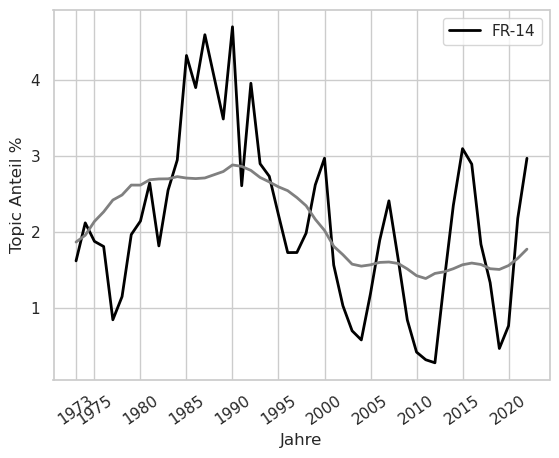

    year     FR-14
0   1973  1.872287
1   1974  1.962178
2   1975  2.143869
3   1976  2.269454
4   1977  2.424633
5   1978  2.491185
6   1979  2.621195
7   1980  2.620701
8   1981  2.691144
9   1982  2.701674
10  1983  2.703321
11  1984  2.732061
12  1985  2.713444
13  1986  2.706460
14  1987  2.714834
15  1989  2.799288
16  1990  2.885876
17  1991  2.866821
18  1992  2.813812
19  1993  2.721274
20  1994  2.662426
21  1995  2.597845
22  1996  2.547627
23  1997  2.456675
24  1998  2.349566
25  1999  2.171027
26  2000  2.025168
27  2001  1.816801
28  2002  1.706006
29  2003  1.581814
30  2004  1.555759
31  2005  1.573089
32  2006  1.604904
33  2007  1.610103
34  2008  1.591240
35  2009  1.519052
36  2010  1.430824
37  2011  1.393225
38  2012  1.460034
39  2013  1.481266
40  2014  1.522057
41  2015  1.574063
42  2016  1.596250
43  2017  1.577490
44  2018  1.521712
45  2019  1.512350
46  2020  1.563469
47  2021  1.658222
48  2022  1.779366


In [14]:
tmp = visualize_topic_over_time(topic_doc_fr, ['FR-14'],
                                smooth=3, trend_line=True, thumbnail=False,
                                save_fig=False)

In [4]:
topic_doc_all = pd.concat([topic_doc_de, topic_doc_fr])
topic_year_all = topic_doc_all.groupby(by='year', as_index=False).mean([f'DE-{i}' for i in range(1, 31)] + [f'FR-{i}' for i in range(1, 31)])[['year'] + [f'DE-{i}' for i in range(1, 31)] + [f'FR-{i}' for i in range(1, 31)]]

In [5]:
topic_doc_all

,id,year,dokument,DE-1,DE-2,DE-3,DE-14,DE-4,DE-9,DE-25,...,FR-19,FR-16,FR-25,FR-26,FR-27,FR-20,FR-28,FR-21,FR-29,FR-30
0,0,1973,1-0_Abaelards_Stellung_zur_Kirchenreform_Eine-...,0.185006,0.142789,0.022729,0.057871,0.000042,0.004975,0.000034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1973,"1-0_Ausbreitung,_Wirksamkeit_und_Ende_der-_257...",0.179893,0.113788,0.002966,0.000022,0.006430,0.041783,0.000015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1973,1-0_Das_Geburtsdatum_Karls_des_Großen-_115-157...,0.094576,0.308472,0.000943,0.004328,0.001037,0.000149,0.008365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1973,1-0_Das_Privileg_des_Bischofs_Berthefrid-_62-1...,0.072285,0.114753,0.005306,0.000883,0.000025,0.000143,0.000020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1973,1-0_Der_Einfluß_der_Französischen_Revolution-_...,0.311585,0.056940,0.061203,0.039696,0.153640,0.103924,0.001278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,507,2022,"49-0_L’Achilleion,_miroir_des_tensions_franco-...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001029,0.034454,0.000023,0.000017,0.000015,0.000012,0.000011,0.008033,0.000009,0.000009
508,508,2022,49-0_L’histoire_des_savoirs_un_fleuve-_457-478...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000016,0.000015,0.000013,0.000010,0.000009,0.001186,0.000007,0.000006,0.000005,0.000005
509,509,2022,49-0_Notger_de_Liège_et_Oliba-_27-52.txt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.089627,0.000391,0.251718,0.012811,0.039732,0.000195,0.000006,0.001512,0.012242,0.000005
510,510,2022,49-0_Solitaires_prospères_ou_membres_d’un-_77-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000020,0.000019,0.000017,0.000012,0.000011,0.000009,0.001728,0.009834,0.000744,0.012535


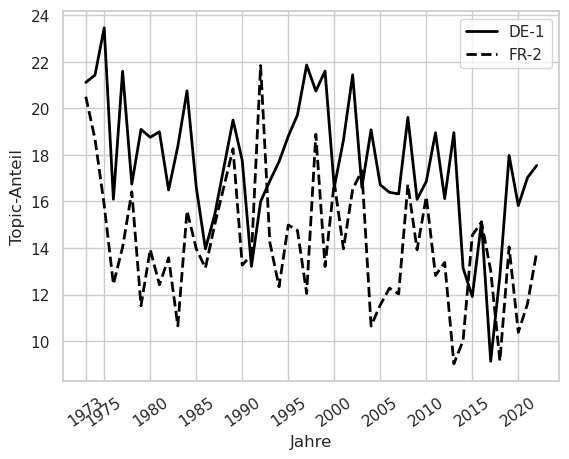

,year,DE-1,DE-2,DE-3,DE-4,DE-5,DE-6,DE-7,DE-8,DE-9,...,FR-21,FR-22,FR-23,FR-24,FR-25,FR-26,FR-27,FR-28,FR-29,FR-30
0,1973,21.115280,0.143829,0.036439,0.029054,0.037613,0.001365,0.024139,0.002483,0.040770,...,0.000099,0.044690,0.026813,0.005150,0.000616,0.000108,0.000453,0.004440,0.000614,0.000013
1,1974,21.431744,0.146023,0.047365,0.045331,0.034893,0.007045,0.045047,0.009792,0.021441,...,0.000046,0.020146,0.116178,0.001954,0.033715,0.003858,0.003146,0.004129,0.071122,0.000604
2,1975,23.462814,0.132063,0.114584,0.083515,0.064839,0.007093,0.024463,0.062621,0.036440,...,0.005588,0.000519,0.110474,0.005275,0.001688,0.004307,0.049405,0.011129,0.007313,0.000733
3,1976,16.097236,0.170654,0.067358,0.052096,0.009373,0.001985,0.036235,0.025095,0.007825,...,0.020141,0.002158,0.031750,0.033754,0.013011,0.002237,0.035289,0.001237,0.076128,0.004801
4,1977,21.594924,0.146306,0.089151,0.029598,0.085695,0.006603,0.014739,0.064681,0.030029,...,0.000727,0.000839,0.029946,0.009791,0.038252,0.004671,0.057472,0.000012,0.001898,0.000009
5,1978,16.750126,0.125804,0.089390,0.045649,0.006977,0.001244,0.036246,0.002791,0.068128,...,0.002925,0.007535,0.042119,0.114384,0.005485,0.002358,0.030808,0.035038,0.001679,0.001754
6,1979,19.099130,0.187541,0.077460,0.033359,0.065517,0.005193,0.037274,0.024793,0.038843,...,0.008790,0.005559,0.007409,0.043080,0.039969,0.000437,0.012404,0.056816,0.028293,0.000709
7,1980,18.758078,0.195862,0.078477,0.016740,0.050897,0.003613,0.093301,0.013057,0.013898,...,0.007036,0.005851,0.026587,0.041300,0.103464,0.003503,0.008832,0.004984,0.003817,0.008572
8,1981,18.993398,0.162980,0.060799,0.019080,0.089525,0.000607,0.028008,0.011524,0.019123,...,0.001318,0.003155,0.052715,0.009438,0.001745,0.007327,0.001851,0.000009,0.002406,0.018588
9,1982,16.494367,0.122556,0.102021,0.029303,0.004178,0.008675,0.067689,0.001128,0.025211,...,0.001158,0.000921,0.002634,0.072214,0.015925,0.002486,0.000870,0.003027,0.000222,0.068971


In [6]:
visualize_data(data=topic_year_all.copy(), x='year', y=['DE-1', 'FR-2'], title='Politische Geschichte', x_label='Jahre', y_label='Topic-Anteil', show_title=False, colors=False, smooth_y=1, trend_line=False)

### Abbildungen:

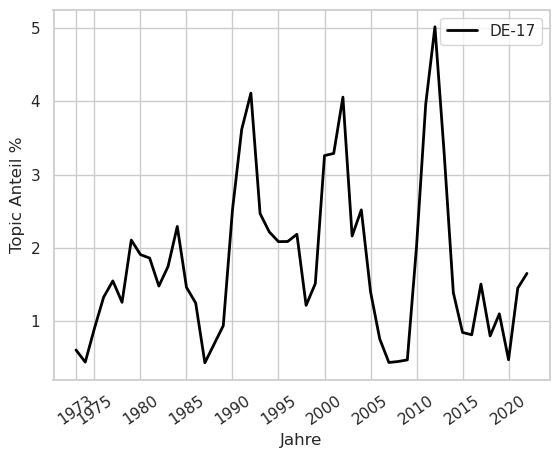

    year     DE-17
0   1973  0.605827
1   1974  0.441093
2   1975  0.901949
3   1976  1.327654
4   1977  1.548832
5   1978  1.256976
6   1979  2.106138
7   1980  1.907707
8   1981  1.859823
9   1982  1.478405
10  1983  1.746330
11  1984  2.291700
12  1985  1.461200
13  1986  1.247550
14  1987  0.431881
15  1989  0.938813
16  1990  2.516962
17  1991  3.613696
18  1992  4.110055
19  1993  2.467079
20  1994  2.216818
21  1995  2.084333
22  1996  2.086394
23  1997  2.184784
24  1998  1.215322
25  1999  1.511733
26  2000  3.257760
27  2001  3.287795
28  2002  4.055406
29  2003  2.161644
30  2004  2.517593
31  2005  1.403794
32  2006  0.757868
33  2007  0.435843
34  2008  0.449352
35  2009  0.471442
36  2010  2.018727
37  2011  3.960069
38  2012  5.014833
39  2013  3.295173
40  2014  1.388956
41  2015  0.845798
42  2016  0.814015
43  2017  1.505614
44  2018  0.798358
45  2019  1.099683
46  2020  0.473417
47  2021  1.450274
48  2022  1.650956


In [8]:
visualize_topic_over_time(topic_doc_de, [f'DE-17'],
                              smooth=3, trend_line=False, thumbnail=False,
                              save_fig=False)

## Wordclouds
We create word clouds for all topics.

In [9]:
create_topic_cloud(old_topic_label['FR'].keys(),
                   '../data/20230305_topic30_frz_korpus_v6_513/francia.diag.xml',
                   '')

"create_topic_cloud(old_topic_label['DE'].keys(),\n                   '../01_topic_models/20230219_topic30_dt_korpus_v7_637/francia.diag.xml',\n                   '../05_visualisierungen/topic_models/wordclouds/',\n                   old_topic_label['DE'])\ncreate_topic_cloud(old_topic_label['FR'].keys(),\n                   '../01_topic_models/20230305_topic30_frz_korpus_v6_513/francia.diag.xml',\n                   '../05_visualisierungen/topic_models/wordclouds/',\n                   old_topic_label['FR'])"